In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [18]:
ml_jobs = pd.read_csv('data\\mlengineer.csv')

Each dataset should only contain postings for one job. We check if this is the case for the Machine Learning (ML) engineer dataset.

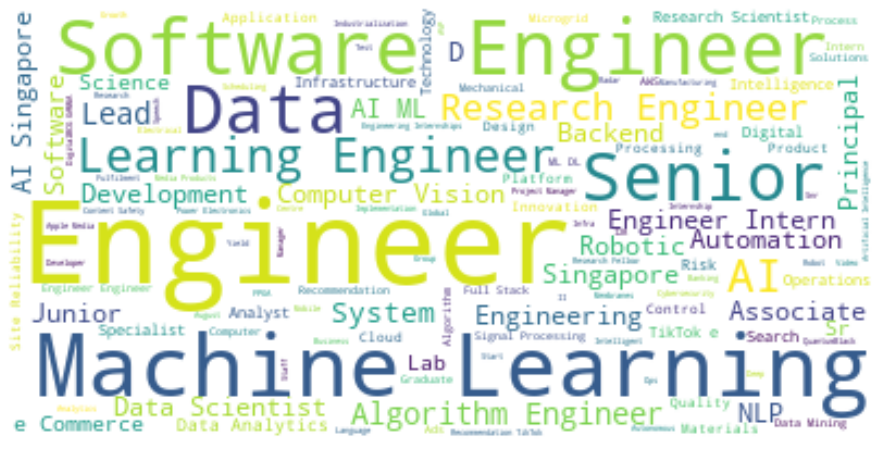

In [19]:
text = ' '.join(ml_jobs["Job Title"])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(16,8) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The above word cloud shows that the dataset contains postings for other roles, such software engineer and data scientist. They need to be removed.

We filter the dataset such that all remaining job titles contain either "Machine Learning" or "ML".

In [20]:
ml_jobs["Job Title"] = ml_jobs["Job Title"].str.replace('ML',
                                                        'Machine Learning')
ml_jobs = ml_jobs[ml_jobs["Job Title"].str.contains('Machine Learning', case=False)]

The remaining dataset has a length of 126, as compared to the original 510.

Next, common acronyms in the job description will be replaced with their full form.

In [21]:
ml_jobs['Job Description'] = ml_jobs['Job Description'].str.replace('ML','Machine Learning')
ml_jobs['Job Description'] = ml_jobs['Job Description'].str.replace('BS','Bachelor\'s')
ml_jobs['Job Description'] = ml_jobs['Job Description'].str.replace('MS','Master\'s')

We repeat the same process for the other datasets.

We export the filtered datasets.

In [22]:
ml_jobs.to_csv('data\\mlengineer_cleaned.csv', index=False)